Markdowns??

In [210]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# Import supplementary visualizations code visuals.py
import visuals as vs
from sklearn.model_selection import train_test_split

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    outcomes = pd.read_csv("500_Cities_Health_Outcomes_raw.csv", index_col = 'Unnamed: 0')
    behaviors = pd.read_csv("500_Cities_Health_Behaviors_raw.csv", index_col = 'Unnamed: 0')
    #data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Health Outcomes dataset has {} samples with {} features each.".format(*outcomes.shape)
    print "Unhealthy Behaviors dataset has {} samples with {} features each.".format(*behaviors.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    

'''
    outcomes = outcomes[pd.notnull(outcomes.CityName)]
behaviors = behaviors[pd.notnull(behaviors.CityName)]

outcomes.drop(['Category', 'UniqueID', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'MeasureId'], axis = 1, inplace = True)
behaviors.drop(['Category', 'UniqueID', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'MeasureId'], axis = 1, inplace = True)



outcomes = outcomes[outcomes.Data_Value_Type != 'Crude prevalence']
behaviors = behaviors[behaviors.Data_Value_Type != 'Crude prevalence']
''' 

display(outcomes.head())
display(behaviors.head())

Health Outcomes dataset has 6500 samples with 8 features each.
Unhealthy Behaviors dataset has 2500 samples with 8 features each.


,Year,StateDesc,CityName,Measure,Data_Value_Type,Data_Value,GeoLocation,Short_Question_Text
26,2014,Alabama,Birmingham,Arthritis among adults aged >=18 Years,Age-adjusted prevalence,32.6,"(33.5275663773, -86.7988174678)",Arthritis
126,2013,Alabama,Birmingham,High blood pressure among adults aged >=18 Years,Age-adjusted prevalence,45.9,"(33.5275663773, -86.7988174678)",High Blood Pressure
227,2014,Alabama,Birmingham,Cancer (excluding skin cancer) among adults ag...,Age-adjusted prevalence,6.1,"(33.5275663773, -86.7988174678)",Cancer (except skin)
326,2014,Alabama,Birmingham,Current asthma among adults aged >=18 Years,Age-adjusted prevalence,11.4,"(33.5275663773, -86.7988174678)",Current Asthma
426,2014,Alabama,Birmingham,Coronary heart disease among adults aged >=18 ...,Age-adjusted prevalence,7.6,"(33.5275663773, -86.7988174678)",Coronary Heart Disease


,Year,StateDesc,CityName,Measure,Data_Value_Type,Data_Value,GeoLocation,Short_Question_Text
10,2014,Alabama,Birmingham,Binge drinking among adults aged >=18 Years,Age-adjusted prevalence,11.4,"(33.5275663773, -86.7988174678)",Binge Drinking
121,2014,Alabama,Birmingham,Current smoking among adults aged >=18 Years,Age-adjusted prevalence,22.0,"(33.5275663773, -86.7988174678)",Current Smoking
217,2014,Alabama,Birmingham,No leisure-time physical activity among adults...,Age-adjusted prevalence,31.7,"(33.5275663773, -86.7988174678)",Physical Activity
317,2014,Alabama,Birmingham,Obesity among adults aged >=18 Years,Age-adjusted prevalence,39.0,"(33.5275663773, -86.7988174678)",Obesity
410,2014,Alabama,Birmingham,Sleeping less than 7 hours among adults aged >...,Age-adjusted prevalence,46.9,"(33.5275663773, -86.7988174678)",Sleep


In [211]:

outcomes['Data_Value'].dtypes
#display(outcomes.iloc[0]) #['CityName'])



dtype('float64')

In [212]:
disease_types = outcomes.Short_Question_Text.unique()
print disease_types
import sys
behavior_types = behaviors.Short_Question_Text.unique()
print "behavior types"
print behavior_types

['Arthritis' 'High Blood Pressure' 'Cancer (except skin)' 'Current Asthma'
 'Coronary Heart Disease' 'COPD' 'Diabetes' 'High Cholesterol'
 'Chronic Kidney Disease' 'Mental Health' 'Physical Health' 'Stroke'
 'Teeth Loss']
behavior types
['Binge Drinking' 'Current Smoking' 'Physical Activity' 'Obesity' 'Sleep']


In [214]:
#display(behave_data.head())


outcomes_head =  outcomes.head(10)
behaviors_head = behaviors.head(10)

#display(head)
outcome = outcomes_head.iloc[0]
behavior = behaviors_head.iloc[0]

outcomes_dict = {outcome.CityName:{outcome.Short_Question_Text: 0}}
behaviors_dict = {behavior.CityName:{behavior.Short_Question_Text: 0}}

for item in outcomes.itertuples():
    
    if item.CityName in outcomes_dict:
        outcomes_dict[item.CityName][item.Short_Question_Text] = item.Data_Value
    else:
        outcomes_dict[item.CityName] = {item.Short_Question_Text:item.Data_Value}
    
    geo_lat, geo_long = tuple(item.GeoLocation.strip('()').split(','))
    #print "lat = {} long = {}".format(geo_lat, geo_long)
    outcomes_dict[item.CityName]['GeoLat'] = float(geo_lat)
    outcomes_dict[item.CityName]['GeoLong'] = float(geo_long)
    
for item in behaviors.itertuples():
    if item.CityName in behaviors_dict:
        behaviors_dict[item.CityName][item.Short_Question_Text] = item.Data_Value
    else:
        behaviors_dict[item.CityName] = {item.Short_Question_Text:item.Data_Value}
    
    geo_lat, geo_long = tuple(item.GeoLocation.strip('()').split(','))
    #print "lat = {} long = {}".format(geo_lat, geo_long)
    behaviors_dict[item.CityName]['GeoLat'] = float(geo_lat)
    behaviors_dict[item.CityName]['GeoLong'] = float(geo_long)
    
    
    #behaviors_dict[item.CityName]['GeoLocation'] = item.GeoLocation
    
print item
    
    
'''
test_dict = {lil_head.StateDesc:{lil_head.CityName:{lil_head.Short_Question_Text: 0}}}
display(test_dict)      


for item in head.itertuples():
    #display(item.StateDesc, item.CityName, item.Short_Question_Text)
    #display(item.Data_Value)
    if item.StateDesc in test_dict:
        if item.CityName in test_dict[item.StateDesc]:
            test_dict[item.StateDesc][item.CityName][item.Short_Question_Text] = item.Data_Value
            #print "{}   {}   {}".format(item.StateDesc, item.CityName, item.Short_Question_Text)
        else:
            test_dict[item.StateDesc][item.CityName] = {item.Short_Question_Text:item.Data_Value}
            #print "{}   {}".format(item.StateDesc, item.CityName)
    else:
        test_dict[item.StateDesc] = {item.CityName:{item.Short_Question:item.Data_Value}}
        print "{}".format(item.StateDesc)

'''        
#display(len(outcomes_dict))
#display(outcomes_dict['Birmingham']['Cancer (except skin)'])

display(outcomes_dict['Birmingham'].keys())

display(behaviors_dict['Birmingham'].keys())

Pandas(Index=145012, Year=2014, StateDesc='Wyoming', CityName='Cheyenne', Measure='Sleeping less than 7 hours among adults aged >=18 Years', Data_Value_Type='Age-adjusted prevalence', Data_Value=31.399999999999999, GeoLocation='(41.1460804265, -104.789064332)', Short_Question_Text='Sleep')


['Chronic Kidney Disease',
 'GeoLat',
 'COPD',
 'Cancer (except skin)',
 'Arthritis',
 'Mental Health',
 'GeoLong',
 'Teeth Loss',
 'Stroke',
 'High Cholesterol',
 'Current Asthma',
 'Diabetes',
 'Physical Health',
 'High Blood Pressure',
 'Coronary Heart Disease']

['GeoLat',
 'Current Smoking',
 'Physical Activity',
 'GeoLong',
 'Binge Drinking',
 'Sleep',
 'Obesity']

In [215]:
outcomes_df = pd.DataFrame.from_dict(outcomes_dict, 'index')
behaviors_df = pd.DataFrame.from_dict(behaviors_dict, 'index')

#display(outcomes_df.Arthritis.head())
#display(outcomes_df.dtypes)
#display(behaviors_df.dtypes)

In [216]:
outcomes_df.to_csv('500_Cities_Health_Outcomes.csv')

In [ ]:
behaviors_df.to_csv('500_Cities_Health_Behaviors.csv')

In [272]:
outcomes_df = pd.read_csv('500_Cities_Health_Outcomes.csv')
behaviors_df = pd.read_csv('500_Cities_Health_Behaviors.csv')
#outcomes_df = outcomes_df.drop('GeoLong', 1, inplace = True)
#outcomes_df = outcomes_df.drop('GeoLat', 1, inplace = True)
outcomes_df.columns
outcomes_df.drop('GeoLong', 1, inplace = True)
outcomes_df.columns

Index([u'Unnamed: 0', u'Chronic Kidney Disease', u'GeoLat', u'COPD',
       u'Cancer (except skin)', u'Arthritis', u'Mental Health', u'Teeth Loss',
       u'Stroke', u'High Cholesterol', u'Current Asthma', u'Diabetes',
       u'Physical Health', u'High Blood Pressure', u'Coronary Heart Disease'],
      dtype='object')

In [273]:
outcomes_df.drop('GeoLat', 1, inplace = True)
outcomes_df.columns

Index([u'Unnamed: 0', u'Chronic Kidney Disease', u'COPD',
       u'Cancer (except skin)', u'Arthritis', u'Mental Health', u'Teeth Loss',
       u'Stroke', u'High Cholesterol', u'Current Asthma', u'Diabetes',
       u'Physical Health', u'High Blood Pressure', u'Coronary Heart Disease'],
      dtype='object')

In [275]:
outcomes_df.set_index('Unnamed: 0', inplace = True) 


In [286]:
#outcomes_df.drop('Unnamed: 0', axis = 0, inplace = True)
#cols = behaviors_df.columns
behaviors_df = behaviors_df.rename(columns={'Unnamed: 0':'Cities'})
behaviors_df.head()

,Cities,GeoLat,Current Smoking,Physical Activity,GeoLong,Binge Drinking,Sleep,Obesity
0,Abilene,32.454651,19.6,27.7,-99.738304,16.2,35.4,33.7
1,Akron,41.080144,26.8,31.0,-81.521921,14.8,44.1,37.3
2,Alameda,37.765085,11.9,18.7,-122.266490,15.0,32.3,18.7
3,Albany,42.666397,19.0,26.1,-73.798683,15.5,39.7,31.1
4,Albuquerque,35.105503,18.8,20.4,-106.647448,14.5,32.8,25.5


In [288]:
behaviors_df.set_index('Cities', inplace = True)
behaviors_df.head()

,GeoLat,Current Smoking,Physical Activity,GeoLong,Binge Drinking,Sleep,Obesity
Cities,,,,,,,
Abilene,32.454651,19.6,27.7,-99.738304,16.2,35.4,33.7
Akron,41.080144,26.8,31.0,-81.521921,14.8,44.1,37.3
Alameda,37.765085,11.9,18.7,-122.266490,15.0,32.3,18.7
Albany,42.666397,19.0,26.1,-73.798683,15.5,39.7,31.1
Albuquerque,35.105503,18.8,20.4,-106.647448,14.5,32.8,25.5


In [290]:
outcomes_df.index.names = ['Cities']
outcomes_df.head()

,Chronic Kidney Disease,COPD,Cancer (except skin),Arthritis,Mental Health,Teeth Loss,Stroke,High Cholesterol,Current Asthma,Diabetes,Physical Health,High Blood Pressure,Coronary Heart Disease
Cities,,,,,,,,,,,,,
Abilene,3.3,6.7,6.0,22.4,11.6,14.3,3.1,34.4,8.9,10.9,12.6,31.6,6.3
Akron,3.3,9.4,5.7,29.0,15.3,23.6,3.9,33.0,11.6,13.0,15.5,36.2,7.5
Alameda,2.2,4.3,5.7,18.5,9.8,7.5,2.2,31.3,7.9,8.1,9.6,24.3,4.5
Albany,2.2,7.1,5.8,25.7,13.2,16.5,3.3,33.8,10.9,10.9,13.1,33.4,6.0
Albuquerque,2.9,5.4,6.1,22.4,11.6,14.0,2.6,29.2,9.8,9.3,12.1,25.9,5.3


In [291]:
#display(behaviors_df[['Current Smoking', 'Physical Activity']].head())
#outcomes_cols= outcomes_df.columns
#display(outcomes_cols[2])
#frames = [outcomes_df, behaviors_df]
frames = [outcomes_df, behaviors_df]
datacorr_df = pd.concat(frames, axis=1)
#datacorr_df.drop(['GeoLocation'])
display(datacorr_df.head(10))

,Chronic Kidney Disease,COPD,Cancer (except skin),Arthritis,Mental Health,Teeth Loss,Stroke,High Cholesterol,Current Asthma,Diabetes,Physical Health,High Blood Pressure,Coronary Heart Disease,GeoLat,Current Smoking,Physical Activity,GeoLong,Binge Drinking,Sleep,Obesity
Cities,,,,,,,,,,,,,,,,,,,,
Abilene,3.3,6.7,6.0,22.4,11.6,14.3,3.1,34.4,8.9,10.9,12.6,31.6,6.3,32.454651,19.6,27.7,-99.738304,16.2,35.4,33.7
Akron,3.3,9.4,5.7,29.0,15.3,23.6,3.9,33.0,11.6,13.0,15.5,36.2,7.5,41.080144,26.8,31.0,-81.521921,14.8,44.1,37.3
Alameda,2.2,4.3,5.7,18.5,9.8,7.5,2.2,31.3,7.9,8.1,9.6,24.3,4.5,37.765085,11.9,18.7,-122.266490,15.0,32.3,18.7
Albany,2.2,7.1,5.8,25.7,13.2,16.5,3.3,33.8,10.9,10.9,13.1,33.4,6.0,42.666397,19.0,26.1,-73.798683,15.5,39.7,31.1
Albuquerque,2.9,5.4,6.1,22.4,11.6,14.0,2.6,29.2,9.8,9.3,12.1,25.9,5.3,35.105503,18.8,20.4,-106.647448,14.5,32.8,25.5
Alexandria,2.2,4.3,5.7,21.4,8.4,8.9,2.3,30.9,8.3,8.1,8.4,27.5,4.7,38.818735,13.0,17.6,-77.086776,15.1,34.5,23.3
Alhambra,2.3,4.0,4.5,16.6,10.1,8.8,2.3,35.3,6.8,10.9,11.4,26.2,4.6,34.083973,12.2,24.8,-118.135514,12.0,38.4,18.1
Allen,2.7,4.2,6.1,18.8,7.9,8.6,2.1,30.2,7.4,7.8,7.8,27.1,4.6,33.108704,12.0,18.8,-96.673537,18.7,32.1,24.2
Allentown,3.0,8.0,5.9,28.4,15.7,20.4,3.5,33.6,10.9,13.2,16.3,33.6,7.2,40.596100,24.3,32.3,-75.475537,15.4,42.3,36.6


In [292]:
#high_corr = Corr_df.corr()
#high_corr = high_corr[high_corr >= 0.9]
#display(high_corr)
maxCOPD = datacorr_df.COPD.max()
minCOPD = datacorr_df.COPD.min()
rangeCOPD = maxCOPD - minCOPD
print "min = {}  max = {}  range = {}".format(minCOPD, maxCOPD, rangeCOPD)

min = 3.3  max = 11.4  range = 8.1


(474,)

(474,)

474

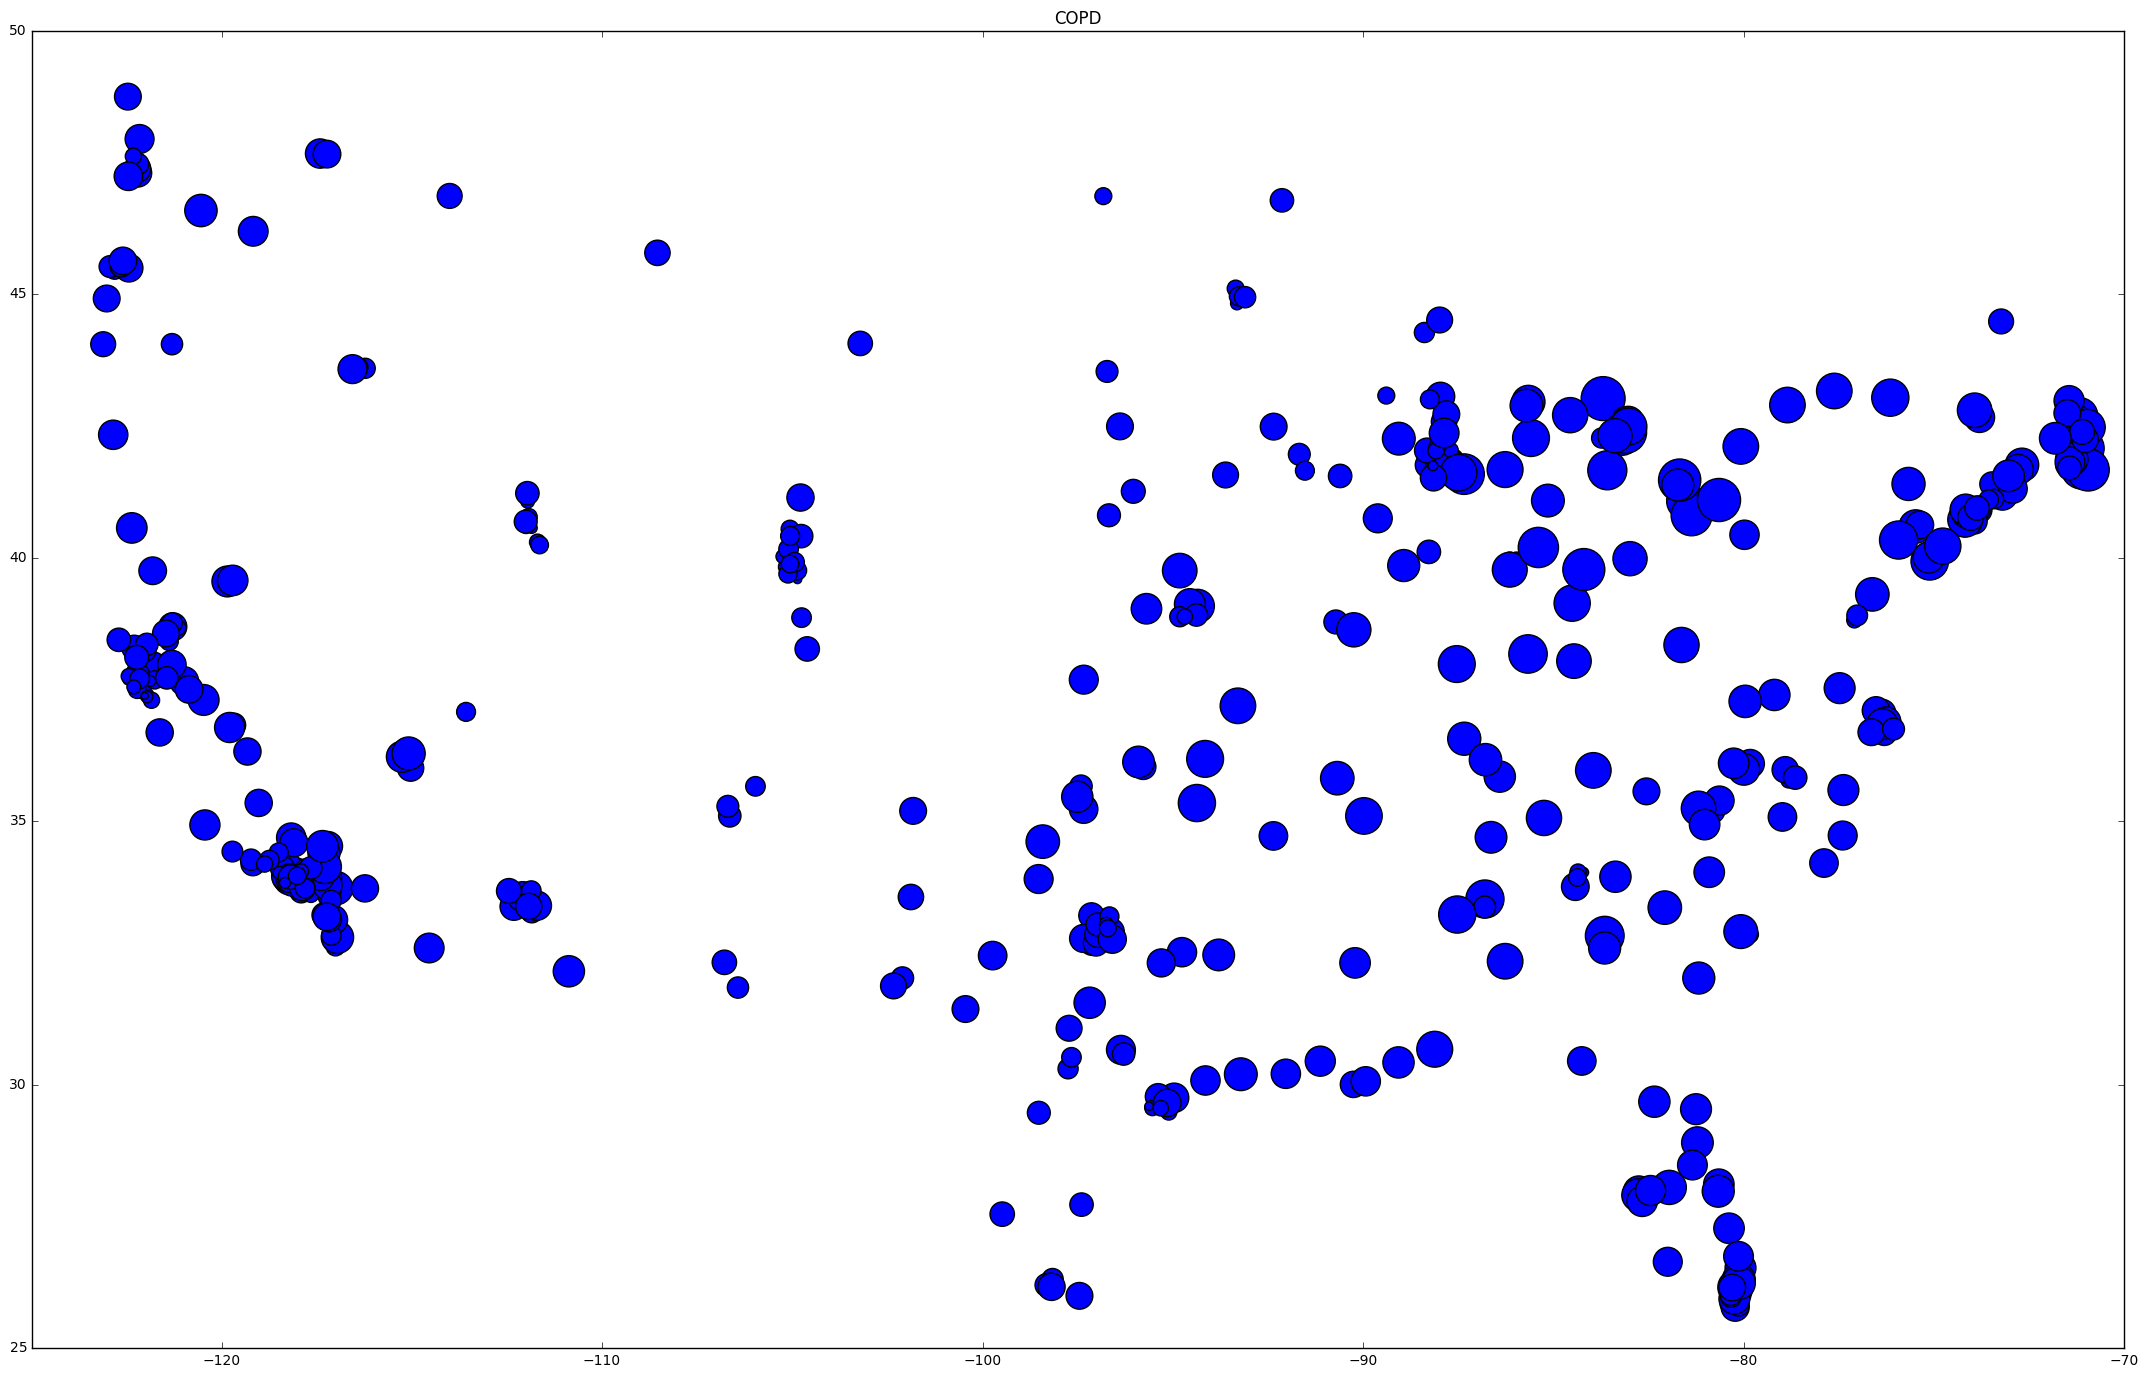

In [327]:
display(datacorr_df.GeoLong.shape)
display(datacorr_df.GeoLat.shape)
display(len(datacorr_df.GeoLat))

f, ax = plt.subplots(figsize=(55/2,35/2))
ax.set_title('COPD')
#plt.title("COPD in Continental US")
ax.axis([-125.0, -70.0, 25.0, 50.0])
ax.scatter(datacorr_df.GeoLong, datacorr_df.GeoLat, s = 1000*(datacorr_df['COPD']-minCOPD)/rangeCOPD)
#plt.figure(figsize =(20,10))
#plt.scatter(datacorr_df.GeoLong, datacorr_df.GeoLat, s = 30*(datacorr_df.COPD-minCOPD)/rangeCOPD)
plt.show()

min = 4.1  max = 6.9  range = 2.8


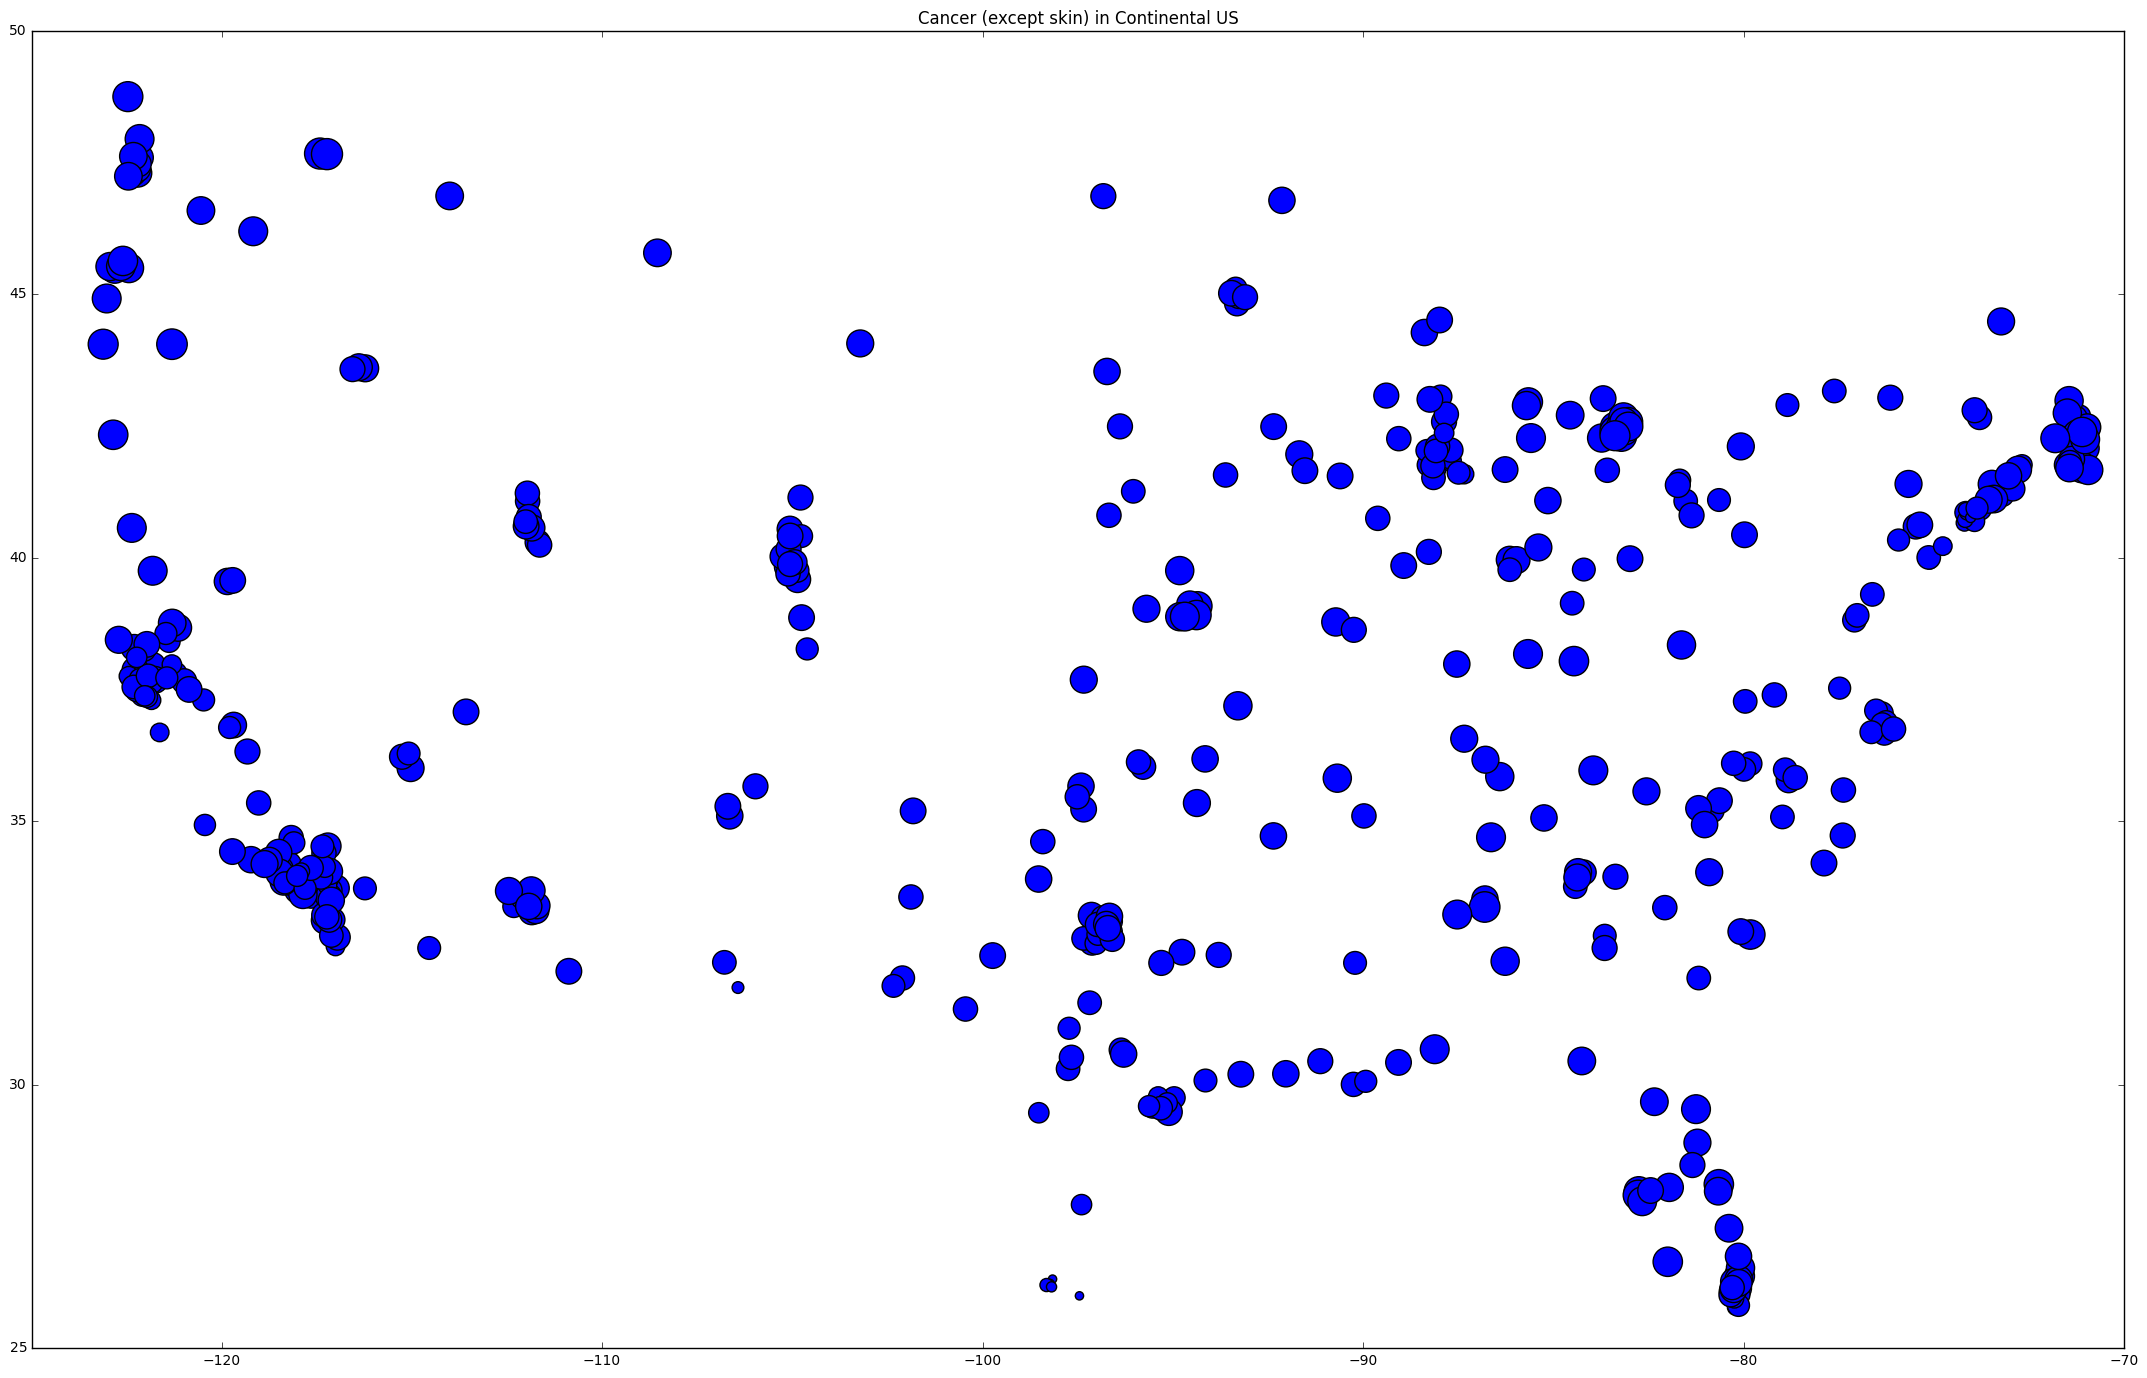

In [325]:
maxCancer = datacorr_df['Cancer (except skin)'].max()
minCancer = datacorr_df['Cancer (except skin)'].min()
rangeCancer = maxCancer - minCancer
print "min = {}  max = {}  range = {}".format(minCancer, maxCancer, rangeCancer)


f, ax = plt.subplots(figsize=(55/2,35/2))
ax.set_title('Cancer (except skin) in Continental US')
#plt.title("COPD in Continental US")
ax.axis([-125.0, -70.0, 25.0, 50.0])
ax.scatter(datacorr_df.GeoLong, datacorr_df.GeoLat, s = 500*(datacorr_df['Cancer (except skin)']-minCancer)/rangeCancer)
#plt.figure(figsize =(20,10))
#plt.scatter(datacorr_df.GeoLong, datacorr_df.GeoLat, s = 30*(datacorr_df.COPD-minCOPD)/rangeCOPD)
plt.show()